#Layer 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
pip install seaborn

In [2]:
names=[]
# Assign column names to the dataset
for i in range(1,769):
 names.append("feature_"+str(i))
labels=["label_1","label_2","label_3","label_4"]
names+=labels

# Read in the dataset
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mini_project/DataSet_L7/train.csv')
valid_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mini_project/DataSet_L7/valid.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mini_project/DataSet_L7/test.csv')

In [3]:
train_df.shape

(28520, 772)

In [4]:
train_df.isnull().sum()

feature_1        0
feature_2        0
feature_3        0
feature_4        0
feature_5        0
              ... 
feature_768      0
label_1          0
label_2        480
label_3          0
label_4          0
Length: 772, dtype: int64

In [5]:
valid_df.isnull().sum()

feature_1       0
feature_2       0
feature_3       0
feature_4       0
feature_5       0
               ..
feature_768     0
label_1         0
label_2        14
label_3         0
label_4         0
Length: 772, dtype: int64

In [6]:
test_df.isnull().sum()
test_df.head()

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,1,0.187868,-0.009268,0.039846,-0.102515,-0.109121,-0.079769,0.061295,-0.042890,0.099860,...,0.043647,0.061174,0.026771,-0.092734,-0.052383,-0.055526,0.029101,0.041857,-0.027872,0.099500
1,2,0.122119,0.019015,0.134483,0.007949,-0.157884,-0.033332,0.044334,-0.016869,-0.014088,...,-0.179798,-0.027611,0.240023,-0.005648,-0.057537,0.023922,-0.038126,-0.015171,-0.006270,-0.003790
2,3,0.079187,0.146195,-0.001316,-0.085596,-0.261093,-0.021620,0.268898,-0.103950,0.068976,...,-0.075460,0.037346,0.124254,-0.369695,-0.056773,-0.028471,0.019971,-0.065683,-0.047366,-0.121744
3,4,0.231196,0.021558,0.215534,-0.210258,-0.158189,0.041621,0.240254,-0.068112,-0.017550,...,0.083334,0.141642,-0.007219,0.031547,-0.010762,-0.169036,-0.030963,0.086698,0.114194,-0.036775
4,5,0.020412,0.063732,-0.065506,-0.089598,-0.130788,-0.018809,0.119304,-0.057494,0.094714,...,-0.001969,-0.003025,-0.021156,-0.136993,-0.003615,0.036371,0.048715,-0.002688,-0.016957,-0.004331


In [7]:
from sklearn.preprocessing import RobustScaler

x_train ={}
y_train ={}
x_valid ={}
y_valid ={}
x_test = {}

df_t = train_df
df_v = valid_df

for label in labels:
  scaler = RobustScaler()
  if label == 'label_2':
    df_t = train_df.dropna()
    df_v = valid_df.dropna()

  x_train[label] = scaler.fit_transform(df_t.drop(labels, axis=1))
  y_train[label] = df_t[label]
  x_valid[label] = scaler.transform(df_v.drop(labels, axis=1))
  y_valid[label] = df_v[label]
  x_test[label] = scaler.transform(test_df.drop(['ID'], axis=1))




##Label 1

In [8]:
from sklearn.decomposition import PCA

# Instantiate PCA with a desired number of components (e.g., n_components=50)
pca = PCA(n_components=0.97)

# Fit PCA on your training data
x_train_pca = pca.fit_transform(x_train['label_1'])

# Transform your validation and test data using the same PCA model
x_valid_pca = pca.transform(x_valid['label_1'])
x_test_pca = pca.transform(x_test['label_1'])  # If you have a test set

# Now, you can use x_train_pca, x_valid_pca, and x_test_pca as your reduced-dimensional feature vectors for modeling.
x_train_pca.shape

(28520, 411)

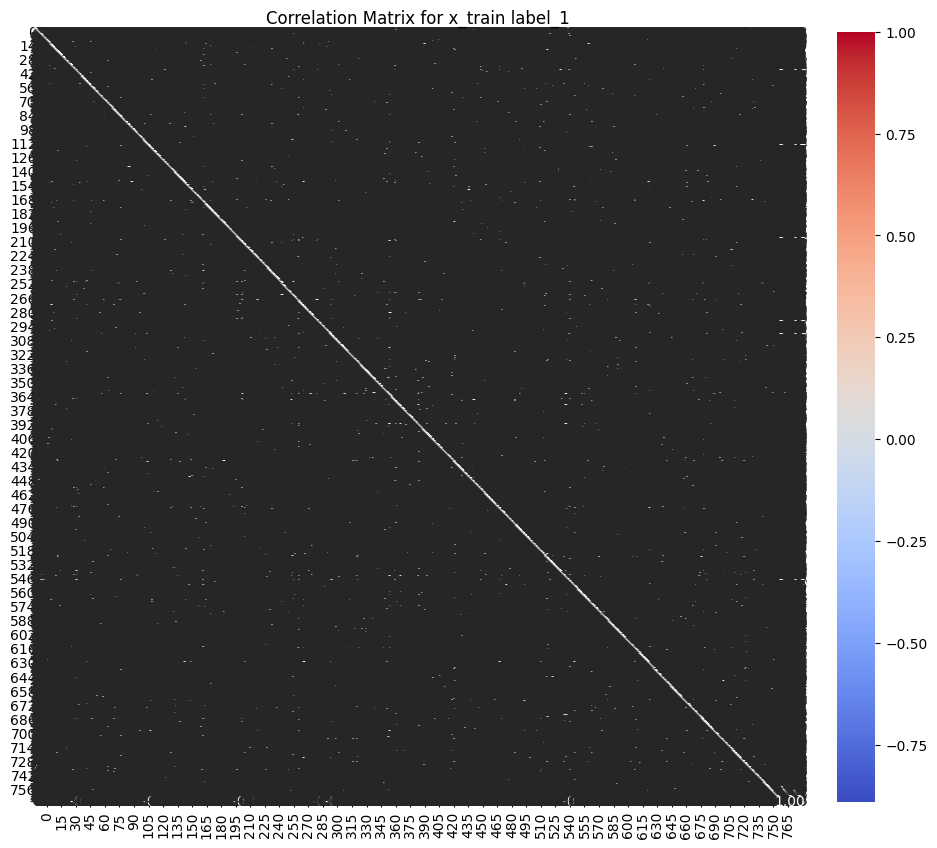

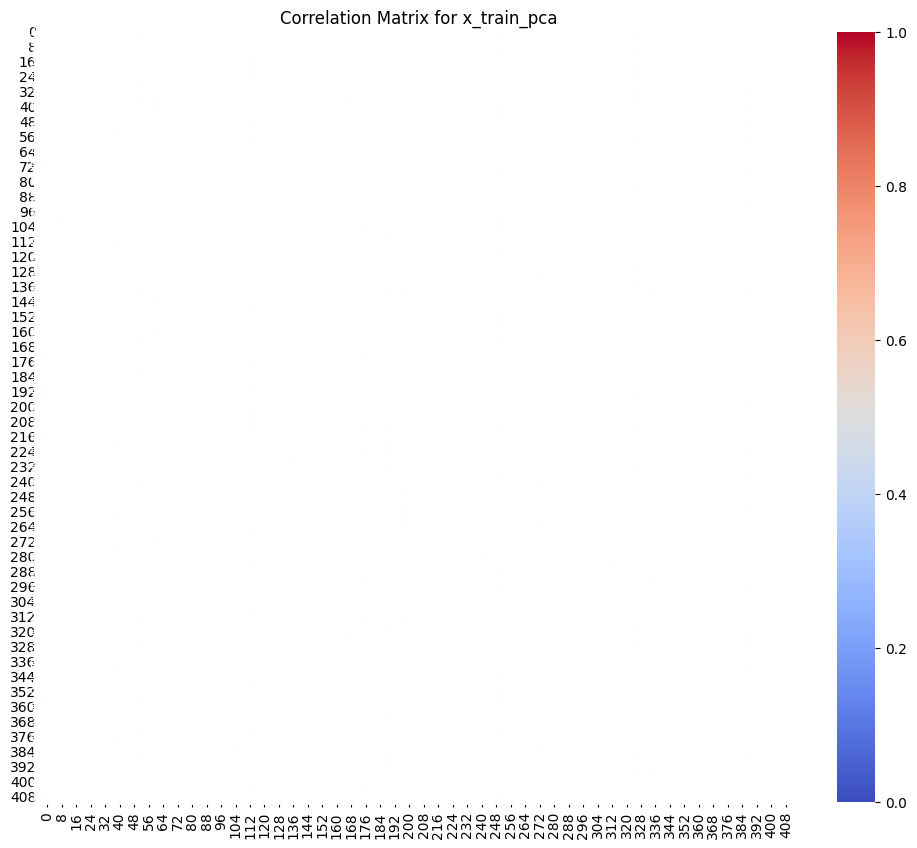

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix for the original x_train data
corr_matrix = pd.DataFrame(x_train['label_1']).corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for x_train label_1")
plt.show()

# Calculate the correlation matrix
corr_matrix = pd.DataFrame(x_train_pca).corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for x_train_pca")
plt.show()

###KNN

####Original


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train['label_1'], y_train['label_1'])

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(x_valid['label_1'])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_valid['label_1'], y_pred))
print(classification_report(y_valid['label_1'], y_pred))

[[11  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ... 19  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  1  0  7]]
              precision    recall  f1-score   support

           1       0.92      0.85      0.88        13
           2       0.82      1.00      0.90         9
           3       0.69      0.92      0.79        12
           4       0.71      0.94      0.81        16
           5       0.83      0.83      0.83        18
           6       0.88      0.78      0.82         9
           7       0.76      0.94      0.84        17
           8       0.92      0.79      0.85        14
           9       0.91      0.91      0.91        11
          10       0.80      1.00      0.89         8
          11       0.78      0.95      0.86        19
          12       0.78      1.00      0.88         7
          13       0.77      0.91      0.83        11
          14       1.00      0.87      0.93        15
          15       0.94      0.94

####After PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train_pca, y_train['label_1'])

y_pred = classifier.predict(x_valid_pca)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_valid['label_1'], y_pred))
print(classification_report(y_valid['label_1'], y_pred))

[[11  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ... 19  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  1  0  7]]
              precision    recall  f1-score   support

           1       0.92      0.85      0.88        13
           2       0.82      1.00      0.90         9
           3       0.69      0.92      0.79        12
           4       0.68      0.94      0.79        16
           5       0.75      0.83      0.79        18
           6       0.88      0.78      0.82         9
           7       0.76      0.94      0.84        17
           8       0.92      0.79      0.85        14
           9       0.91      0.91      0.91        11
          10       0.80      1.00      0.89         8
          11       0.78      0.95      0.86        19
          12       0.70      1.00      0.82         7
          13       0.77      0.91      0.83        11
          14       0.92      0.80      0.86        15
          15       0.94      0.94

###SVM

####Original

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import uniform, randint

In [ ]:
svm_classifier = SVC(class_weight='balanced' ,C=1, kernel='rbf')
svm_classifier.fit(x_train['label_1'], y_train['label_1'])

# Make predictions on the test data
y_pred = svm_classifier.predict(x_valid['label_1'])

# Evaluate model performance
print(accuracy_score(y_valid['label_1'], y_pred))

0.956


####After PCA

In [ ]:
svm_classifier = SVC(class_weight='balanced' ,C=1, kernel='rbf')
svm_classifier.fit(x_train_pca, y_train['label_1'])

# Make predictions on the test data
y_pred = svm_classifier.predict(x_valid_pca)

# Evaluate model performance
print(accuracy_score(y_valid['label_1'], y_pred))

0.9573333333333334


####After PCA + HP tuning

In [ ]:
# svm_classifier = SVC(class_weight='balanced' ,C=10, degree=1, gamma='auto', kernel='poly') #=0.97
svm_classifier = SVC(class_weight='balanced' ,C=100, degree=3,  kernel='rbf') #0.98
svm_classifier.fit(x_train_pca, y_train['label_1'])

# Make predictions on the test data
y_pred = svm_classifier.predict(x_valid_pca)

# Evaluate model performance
print(classification_report(y_valid['label_1'], y_pred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00         9
           3       0.92      1.00      0.96        12
           4       0.89      1.00      0.94        16
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00         9
           7       1.00      0.94      0.97        17
           8       1.00      1.00      1.00        14
           9       1.00      0.91      0.95        11
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00         7
          13       1.00      0.91      0.95        11
          14       0.94      1.00      0.97        15
          15       1.00      0.94      0.97        17
          16       1.00      1.00      1.00        14
          17       1.00      1.00      1.00        14
          18       1.00    

In [ ]:
# Define the cross-validation strategy (e.g., StratifiedKFold with 5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy scores
scores = cross_val_score(svm_classifier, x_train_pca, y_train['label_1'], cv=cv, scoring='accuracy')

# Print the cross-validation scores and mean accuracy
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.96721599 0.97089762 0.9684432  0.96686536 0.97212482]
Mean accuracy: 0.9691093969144461


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the cross-validation strategy (e.g., StratifiedKFold with 5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define your SVM classifier with the desired hyperparameters
svm_classifier = SVC(class_weight='balanced' ,C=10, degree=1, gamma='auto', kernel='poly') #=0.97 -> 0.95
# svm_classifier = SVC(class_weight='balanced' ,C=100, degree=3,  kernel='rbf') #0.98 -> 0.96

# Perform cross-validation and calculate accuracy scores
scores = cross_val_score(svm_classifier, x_train_pca, y_train['label_1'], cv=cv, scoring='accuracy')

# Print the cross-validation scores and mean accuracy
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.94652875 0.95038569 0.95319074 0.95126227 0.94968443]
Mean accuracy: 0.9502103786816269


In [ ]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1,10,100],  # Adjust the range
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Experiment with different kernels
    'class_weight': ['balanced',None],  # Change class_weight options
    'gamma':['scale', 'auto'],
    'degree': [1,2,3,4]

}

# Create an SVM classifier
svm_classifier = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, scoring='accuracy', cv=5,n_jobs=-1)
grid_search.fit(x_train_pca, y_train['label_1'])

# Get the best model and hyperparameters
best_svm_classifier = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the validation set
y_pred = best_svm_classifier.predict(x_valid_pca)

# Evaluate the model
print("Best Hyperparameters:", best_params)
print("Classification Report on Validation Data:")
print(classification_report(y_valid['label_1'], y_pred))

In [ ]:
param_distributions = {
    'C': [0.001,0.1,1,10,100],#uniform(0.001,100),  # Continuous uniform distribution for 'C'
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Experiment with different kernels
    # 'class_weight': ['balanced', None],  # Change class_weight options
    # 'gamma':['scale', 'auto'],
    'degree': [1,2,3,4]
}

# Create an SVM classifier
svm_classifier = SVC()

# Example with Randomized Search
random_search = RandomizedSearchCV(svm_classifier, param_distributions, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search.fit(x_train_pca, y_train['label_1'])

# Get the best hyperparameters and model
best_svm_classifier = random_search.best_estimator_
best_params = random_search.best_params_

# Make predictions on the validation data
y_pred = best_svm_classifier.predict(x_valid_pca)

# Evaluate the model
print("Best Hyperparameters:", best_params)
print("Classification Report on Validation Data:")
print(classification_report(y_valid['label_1'], y_pred))

Best Hyperparameters: {'kernel': 'rbf', 'degree': 3, 'C': 100}
Classification Report on Validation Data:
              precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00         9
           3       0.92      1.00      0.96        12
           4       0.89      1.00      0.94        16
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00         9
           7       1.00      0.94      0.97        17
           8       1.00      1.00      1.00        14
           9       1.00      0.91      0.95        11
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00         7
          13       1.00      0.91      0.95        11
          14       0.94      1.00      0.97        15
          15       1.00      0.94      0.97        17
          16       1.00      1

In [ ]:
label_1_pred = svm_classifier.predict(x_test_pca)

###Random Forest

####Orginal

In [11]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train['label_1'], y_train['label_1'])


RandomForestClassifier()

In [ ]:
# Make predictions on the test data
y_pred = model.predict(x_valid['label_1'])

# Evaluate model performance
print(classification_report(y_valid['label_1'], y_pred))

              precision    recall  f1-score   support

           1       0.83      0.77      0.80        13
           2       0.89      0.89      0.89         9
           3       0.79      0.92      0.85        12
           4       0.89      1.00      0.94        16
           5       0.89      0.89      0.89        18
           6       0.90      1.00      0.95         9
           7       0.84      0.94      0.89        17
           8       1.00      0.79      0.88        14
           9       0.90      0.82      0.86        11
          10       0.89      1.00      0.94         8
          11       0.90      0.95      0.92        19
          12       0.88      1.00      0.93         7
          13       0.91      0.91      0.91        11
          14       0.88      0.93      0.90        15
          15       0.89      0.94      0.91        17
          16       0.87      0.93      0.90        14
          17       0.87      0.93      0.90        14
          18       0.92    

###XGBoost

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Initialize the XGBoost classifier
model = xgb.XGBClassifier()
y_train_shifted = y_train['label_1'] - 1

# Train the model
model.fit(x_train['label_1'],y_train_shifted )




KeyboardInterrupt: ignored

In [ ]:
y_pred = model.predict(x_valid['label_1'])

accuracy = accuracy_score(y_valid['label_1'], y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Additional evaluation metrics
print(classification_report(y_valid['label_1'], y_pred))


###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Initialize the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(x_train['label_1'], y_train['label_1'])


DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = model.predict(x_valid['label_1'])


In [ ]:
accuracy = accuracy_score(y_valid['label_1'], y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Additional evaluation metrics
print(classification_report(y_valid['label_1'], y_pred))


Accuracy: 0.37
              precision    recall  f1-score   support

           1       0.27      0.31      0.29        13
           2       0.33      0.44      0.38         9
           3       0.40      0.33      0.36        12
           4       0.38      0.38      0.38        16
           5       0.42      0.28      0.33        18
           6       0.27      0.33      0.30         9
           7       0.50      0.35      0.41        17
           8       0.33      0.29      0.31        14
           9       0.55      0.55      0.55        11
          10       0.71      0.62      0.67         8
          11       0.69      0.47      0.56        19
          12       0.67      0.86      0.75         7
          13       0.19      0.27      0.22        11
          14       0.40      0.40      0.40        15
          15       0.45      0.53      0.49        17
          16       0.30      0.21      0.25        14
          17       0.62      0.57      0.59        14
          18

##Label 2

In [ ]:
from sklearn.decomposition import PCA

# Instantiate PCA with a desired number of components (e.g., n_components=50)
pca = PCA(n_components=0.97)

# Fit PCA on your training data
x_train_pca = pca.fit_transform(x_train['label_2'])

# Transform your validation and test data using the same PCA model
x_valid_pca = pca.transform(x_valid['label_2'])
x_test_pca = pca.transform(x_test['label_2'])  # If you have a test set

# Now, you can use x_train_pca, x_valid_pca, and x_test_pca as your reduced-dimensional feature vectors for modeling.
x_train_pca.shape

(28040, 411)

###KNN

####Original


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train['label_2'], y_train['label_2'])

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(x_valid['label_2'])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_valid['label_2'], y_pred))
print(classification_report(y_valid['label_2'], y_pred))

[[ 29   1   1   0   4   0   0   1   0   0   0   0   0   0   0   0   0]
 [  4  60   1   0   4   1   0   0   0   0   0   0   0   0   0   1   0]
 [  1   2  39   1   1   0   0   0   0   1   0   1   0   0   0   0   0]
 [  1   1   1  65   5   3   0   0   1   1   0   0   0   0   1   0   0]
 [  0   1   1   1 108   1   1   1   0   0   1   0   0   0   0   0   0]
 [  2   4   1   0   1  70   0   2   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   2   2  41   0   0   0   0   0   0   0   1   0   0]
 [  0   1   0   0   2   2   0  40   0   0   0   0   0   0   0   0   0]
 [  0   2   0   2   3   0   2   0  37   1   0   1   0   0   0   0   0]
 [  2   0   1   1   3   0   0   0   0  58   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0  10   0   0   0   0   0   0]
 [  0   0   1   0   2   0   0   0   0   0   0  27   0   0   0   0   0]
 [  0   0   0   0   1   0   1   0   0   0   0   0   9   0   0   0   0]
 [  0   0   0   0   2   0   0   0   0   0   0   0   0   9   0   0   0]
 [  0 

####After PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train_pca, y_train['label_2'])

y_pred = classifier.predict(x_valid_pca)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_valid['label_2'], y_pred))
print(classification_report(y_valid['label_2'], y_pred))

[[ 30   1   1   0   3   0   0   1   0   0   0   0   0   0   0   0   0]
 [  4  60   1   1   4   0   0   0   0   0   0   0   0   0   0   1   0]
 [  1   2  39   1   1   0   0   0   0   1   0   1   0   0   0   0   0]
 [  1   2   2  64   4   3   0   0   1   1   0   0   0   0   1   0   0]
 [  0   1   1   1 108   1   1   1   0   0   1   0   0   0   0   0   0]
 [  2   5   1   0   1  70   0   1   1   0   0   0   0   0   0   0   0]
 [  0   1   0   1   1   2  40   0   0   0   0   0   0   0   1   0   0]
 [  1   1   0   0   2   1   0  40   0   0   0   0   0   0   0   0   0]
 [  0   2   0   2   4   0   2   0  36   1   0   1   0   0   0   0   0]
 [  2   0   1   1   3   0   0   0   0  58   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0  10   0   0   0   0   0   0]
 [  0   0   1   0   2   0   0   0   0   0   0  27   0   0   0   0   0]
 [  0   0   1   0   1   0   1   0   0   0   0   0   8   0   0   0   0]
 [  0   0   0   0   2   0   0   0   0   0   0   0   0   9   0   0   0]
 [  0 

####KNN with tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

param_grid = {
    'n_neighbors': [1, 2,3,4, 5, 6,7,8, 9,10]  # You can adjust this range as needed
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train['label_2'], y_train['label_2'])
best_k = grid_search.best_params_['n_neighbors']

final_classifier = KNeighborsClassifier(n_neighbors=best_k)
final_classifier.fit(x_train['label_2'], y_train['label_2'])

y_pred = final_classifier.predict(x_valid['label_2'])

print('Best k:',best_k)
print(confusion_matrix(y_valid['label_2'], y_pred))
print(classification_report(y_valid['label_2'], y_pred))


Best k: 1
[[ 31   0   2   0   2   0   0   1   0   0   0   0   0   0   0   0   0]
 [  3  61   0   1   6   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   2  39   0   1   1   0   1   0   0   0   1   0   0   0   0   0]
 [  1   0   1  67   5   1   2   0   0   2   0   0   0   0   0   0   0]
 [  0   1   1   2 110   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   1   0   0  73   3   1   1   0   0   0   0   0   0   0   0]
 [  0   0   1   1   2   2  37   1   0   1   0   0   0   0   1   0   0]
 [  0   2   0   0   0   2   0  41   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   4   0   3   0  38   0   0   1   0   0   0   0   1]
 [  1   0   1   1   2   0   0   0   0  58   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  11   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   1   0   0  28   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0  10   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0  10   0   0  

####PCA+ KNN tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

param_grid = {
    'leaf_size' : list(range(1,50)),
    'n_neighbors' :list(range(1,30)),
    # 'n_neighbors': [1, 2,3,4, 5, 6,7,8, 9,10],  # You can adjust this range as needed
    'p': [1, 2]
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train_pca, y_train['label_2'])
best_k = grid_search.best_params_['n_neighbors','leaf_size', 'p']

final_classifier = KNeighborsClassifier(n_neighbors=best_k)
final_classifier.fit(x_train_pca, y_train['label_2'])

y_pred = final_classifier.predict(x_valid_pca)

print('Best k:',best_k)
print(confusion_matrix(y_valid['label_2'], y_pred))
print(classification_report(y_valid['label_2'], y_pred))

Best k: 1
[[ 30   0   2   0   3   0   0   1   0   0   0   0   0   0   0   0   0]
 [  3  61   0   1   5   1   0   0   0   0   0   0   0   0   0   0   0]
 [  1   2  39   0   1   1   0   1   0   0   0   1   0   0   0   0   0]
 [  1   1   1  67   5   1   1   0   0   2   0   0   0   0   0   0   0]
 [  0   1   1   2 110   1   0   0   0   0   0   0   0   0   0   0   0]
 [  1   2   1   0   1  71   3   1   1   0   0   0   0   0   0   0   0]
 [  0   0   1   1   2   2  37   1   0   1   0   0   0   0   1   0   0]
 [  1   2   0   0   0   1   0  41   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   3   0   3   0  39   0   0   1   0   0   0   0   1]
 [  1   0   2   1   2   0   0   0   0  58   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  11   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   1   0   0  28   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0  10   0   0   0   0]
 [  0   0   0   0   2   0   0   0   0   0   0   0   0   9   0   0  

In [ ]:
print('Best leaf_size:', grid_search.best_estimator_.get_params()['leaf_size'])
print('Best p:', grid_search.best_estimator_.get_params()['p'])
print('Best n_neighbors:', grid_search.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 1


###SVM

####Original

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy.stats import uniform, randint

In [ ]:
svm_classifier = SVC(class_weight='balanced' ,C=1, kernel='rbf')
svm_classifier.fit(x_train['label_2'], y_train['label_2'])

# Make predictions on the test data
y_pred = svm_classifier.predict(x_valid['label_2'])

# Evaluate model performance
print(classification_report(y_valid['label_2'], y_pred))

              precision    recall  f1-score   support

        22.0       0.92      0.94      0.93        36
        23.0       0.90      0.92      0.91        71
        24.0       0.92      0.98      0.95        46
        25.0       0.88      0.82      0.85        79
        26.0       0.94      0.92      0.93       115
        27.0       0.97      0.84      0.90        81
        28.0       0.88      0.96      0.92        46
        29.0       0.93      0.96      0.95        45
        30.0       0.90      0.98      0.94        48
        31.0       0.91      0.95      0.93        65
        32.0       1.00      1.00      1.00        11
        33.0       0.85      0.97      0.91        30
        34.0       1.00      0.91      0.95        11
        35.0       1.00      0.91      0.95        11
        36.0       1.00      1.00      1.00         8
        41.0       1.00      1.00      1.00        14
        61.0       1.00      0.95      0.97        19

    accuracy              

####After PCA

In [ ]:
svm_classifier = SVC(class_weight='balanced' ,C=1, kernel='rbf')
svm_classifier.fit(x_train_pca, y_train['label_2'])

# Make predictions on the test data
y_pred = svm_classifier.predict(x_valid_pca)

# Evaluate model performance
print(classification_report(y_valid['label_2'], y_pred))

              precision    recall  f1-score   support

        22.0       0.87      0.94      0.91        36
        23.0       0.91      0.90      0.91        71
        24.0       0.92      0.96      0.94        46
        25.0       0.86      0.82      0.84        79
        26.0       0.93      0.91      0.92       115
        27.0       0.97      0.83      0.89        81
        28.0       0.86      0.96      0.91        46
        29.0       0.91      0.93      0.92        45
        30.0       0.90      0.94      0.92        48
        31.0       0.90      0.94      0.92        65
        32.0       1.00      1.00      1.00        11
        33.0       0.83      0.97      0.89        30
        34.0       1.00      0.91      0.95        11
        35.0       1.00      0.91      0.95        11
        36.0       1.00      1.00      1.00         8
        41.0       1.00      1.00      1.00        14
        61.0       1.00      0.95      0.97        19

    accuracy              

####After PCA + HP tuning

In [ ]:
svm_classifier = SVC(class_weight='balanced' ,C=10, degree=1, gamma=0.1, kernel='poly')
svm_classifier.fit(x_train_pca, y_train['label_2'])

# Make predictions on the test data
y_pred = svm_classifier.predict(x_valid_pca)

# Evaluate model performance
print(classification_report(y_valid['label_2'], y_pred))

              precision    recall  f1-score   support

        22.0       0.78      0.86      0.82        36
        23.0       0.68      0.83      0.75        71
        24.0       0.68      0.87      0.76        46
        25.0       0.75      0.73      0.74        79
        26.0       0.82      0.70      0.75       115
        27.0       0.81      0.75      0.78        81
        28.0       0.75      0.83      0.78        46
        29.0       0.91      0.89      0.90        45
        30.0       0.84      0.75      0.79        48
        31.0       0.81      0.78      0.80        65
        32.0       1.00      1.00      1.00        11
        33.0       0.90      0.93      0.92        30
        34.0       1.00      0.91      0.95        11
        35.0       1.00      0.82      0.90        11
        36.0       0.89      1.00      0.94         8
        41.0       1.00      0.86      0.92        14
        61.0       1.00      0.95      0.97        19

    accuracy              

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1,10,100],  # Adjust the range
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Experiment with different kernels
    'class_weight': ['balanced',None],  # Change class_weight options
    'gamma':['scale', 'auto'],
    'degree': [1,2,3,4]

}

# Create an SVM classifier
svm_classifier = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, scoring='accuracy', cv=5,n_jobs=-1)
grid_search.fit(x_train_pca, y_train['label_1'])

# Get the best model and hyperparameters
best_svm_classifier = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the validation set
y_pred = best_svm_classifier.predict(x_valid_pca)

# Evaluate the model
print("Best Hyperparameters:", best_params)
print("Classification Report on Validation Data:")
print(classification_report(y_valid['label_1'], y_pred))

In [ ]:
param_distributions = {
    'C': [0.1,1,10,100],#uniform(0.001,100),  # Continuous uniform distribution for 'C'
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Experiment with different kernels
    # 'class_weight': ['balanced', None],  # Change class_weight options
    # 'gamma':['scale', 'auto'],
    'degree': [1,2,3,4]
}

# Create an SVM classifier
svm_classifier = SVC()

# Example with Randomized Search
random_search = RandomizedSearchCV(svm_classifier, param_distributions, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(x_train_pca, y_train['label_2'])


# Get the best hyperparameters and model
best_svm_classifier = random_search.best_estimator_
best_params = random_search.best_params_

# Make predictions on the validation data
y_pred = best_svm_classifier.predict(x_valid_pca)

# Evaluate the model
print("Best Hyperparameters:", best_params)
print("Classification Report on Validation Data:")
print(classification_report(y_valid['label_2'], y_pred))

Best Hyperparameters: {'kernel': 'rbf', 'degree': 4, 'C': 100}
Classification Report on Validation Data:
              precision    recall  f1-score   support

        22.0       0.92      1.00      0.96        36
        23.0       0.96      0.96      0.96        71
        24.0       0.94      0.96      0.95        46
        25.0       0.94      0.91      0.92        79
        26.0       0.93      0.98      0.96       115
        27.0       0.96      0.89      0.92        81
        28.0       0.96      0.96      0.96        46
        29.0       0.98      0.93      0.95        45
        30.0       0.92      0.98      0.95        48
        31.0       0.95      0.97      0.96        65
        32.0       1.00      1.00      1.00        11
        33.0       1.00      0.97      0.98        30
        34.0       1.00      0.91      0.95        11
        35.0       1.00      0.91      0.95        11
        36.0       1.00      1.00      1.00         8
        41.0       1.00      1

In [ ]:
label_1_pred = svm_classifier.predict(x_test_pca)

###Random Forest

####Orginal

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier  # You can replace this with any other model


In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train['label_2'], y_train['label_2'])  # Assuming x_train and y_train are your feature and target data


RandomForestClassifier()

In [ ]:
# Make predictions on the test data
y_pred = model.predict(x_valid['label_2'])

# Evaluate model performance
print(classification_report(y_valid['label_2'], y_pred))

              precision    recall  f1-score   support

        22.0       1.00      0.56      0.71        36
        23.0       0.84      0.75      0.79        71
        24.0       0.88      0.78      0.83        46
        25.0       0.78      0.73      0.76        79
        26.0       0.55      0.96      0.70       115
        27.0       0.86      0.88      0.87        81
        28.0       0.83      0.74      0.78        46
        29.0       1.00      0.73      0.85        45
        30.0       0.95      0.77      0.85        48
        31.0       0.88      0.80      0.84        65
        32.0       1.00      0.73      0.84        11
        33.0       1.00      0.80      0.89        30
        34.0       1.00      0.82      0.90        11
        35.0       1.00      0.82      0.90        11
        36.0       1.00      1.00      1.00         8
        41.0       1.00      0.71      0.83        14
        61.0       1.00      0.79      0.88        19

    accuracy              

##Label 3

In [ ]:
from sklearn.decomposition import PCA

# Instantiate PCA with a desired number of components (e.g., n_components=50)
pca = PCA(n_components=0.97)

# Fit PCA on your training data
x_train_pca = pca.fit_transform(x_train['label_3'])

# Transform your validation and test data using the same PCA model
x_valid_pca = pca.transform(x_valid['label_3'])
x_test_pca = pca.transform(x_test['label_3'])  # If you have a test set

# Now, you can use x_train_pca, x_valid_pca, and x_test_pca as your reduced-dimensional feature vectors for modeling.
x_train_pca.shape

(28040, 411)

###KNN

####Original


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train['label_3'], y_train['label_3'])

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(x_valid['label_3'])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(confusion_matrix(y_valid['label_3'], y_pred))
print(accuracy_score(y_valid['label_3'], y_pred))

[[137   5]
 [  6 588]]
0.9850543478260869


####After PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train_pca, y_train['label_3'])

y_pred = classifier.predict(x_valid_pca)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_valid['label_3'], y_pred))
print(accuracy_score(y_valid['label_3'], y_pred))

[[139   3]
 [  6 588]]
0.9877717391304348


###SVM

####Original

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import uniform, randint

In [ ]:
svm_classifier = SVC(class_weight='balanced' ,C=1, kernel='rbf')
svm_classifier.fit(x_train['label_3'], y_train['label_3'])

# Make predictions on the test data
y_pred = svm_classifier.predict(x_valid['label_3'])

# Evaluate model performance
print(accuracy_score(y_valid['label_3'], y_pred))

0.998641304347826


####After PCA

In [ ]:
svm_classifier = SVC(class_weight='balanced' ,C=1, kernel='rbf')
svm_classifier.fit(x_train_pca, y_train['label_3'])

# Make predictions on the test data
y_pred = svm_classifier.predict(x_valid_pca)

# Evaluate model performance
print(accuracy_score(y_valid['label_3'], y_pred))

0.998641304347826


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the cross-validation strategy (e.g., StratifiedKFold with 5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define your SVM classifier with the desired hyperparameters
svm_classifier = SVC(class_weight='balanced', C=1, kernel='rbf')

# Perform cross-validation and calculate accuracy scores
scores = cross_val_score(svm_classifier, x_train['label_3'], y_train['label_3'], cv=cv, scoring='accuracy')

# Print the cross-validation scores and mean accuracy
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.99696862 0.9978602  0.99875178 0.99857347 0.9989301 ]
Mean accuracy: 0.9982168330955778


####After PCA + HP tuning

In [ ]:
# svm_classifier = SVC(class_weight='balanced' ,C=1, degree=4, gamma='auto', kernel='linear') #0.9918478
svm_classifier = SVC(class_weight='balanced' ,C=50 ,kernel='rbf') #0.998641
#Best Hyperparameters: {'C': 30.46237691733707, 'degree': 1, 'kernel': 'poly'} =0.99
svm_classifier.fit(x_train_pca, y_train['label_3'])

# Make predictions on the test data
y_pred = svm_classifier.predict(x_valid_pca)

# Evaluate model performance
print(accuracy_score(y_valid['label_3'], y_pred))

0.998641304347826


In [ ]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1,10,100],  # Adjust the range
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Experiment with different kernels
    'class_weight': ['balanced',None],  # Change class_weight options
    'gamma':['scale', 'auto'],
    'degree': [1,2,3,4]

}

# Create an SVM classifier
svm_classifier = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, scoring='accuracy', cv=5,n_jobs=-1)
grid_search.fit(x_train_pca, y_train['label_1'])

# Get the best model and hyperparameters
best_svm_classifier = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the validation set
y_pred = best_svm_classifier.predict(x_valid_pca)

# Evaluate the model
print("Best Hyperparameters:", best_params)
print("Classification Report on Validation Data:")
print(classification_report(y_valid['label_1'], y_pred))

In [ ]:
param_distributions = {
    'C': uniform(0.001,100),  # Continuous uniform distribution for 'C'
    'kernel': ['linear','poly'],  # Experiment with different kernels
    # 'class_weight': ['balanced', None],  # Change class_weight options
    # 'gamma':['scale', 'auto'],
    'degree': [1,2,3,4]
}

# Create an SVM classifier
svm_classifier = SVC()

# Example with Randomized Search
random_search = RandomizedSearchCV(svm_classifier, param_distributions, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search.fit(x_train_pca, y_train['label_3'])


# Get the best hyperparameters and model
best_svm_classifier = random_search.best_estimator_
best_params = random_search.best_params_

# Make predictions on the validation data
y_pred = best_svm_classifier.predict(x_valid_pca)

# Evaluate the model
print("Best Hyperparameters:", best_params)
print("Classification Report on Validation Data:")
print(classification_report(y_valid['label_3'], y_pred))

Best Hyperparameters: {'C': 30.46237691733707, 'degree': 1, 'kernel': 'poly'}
Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       142
           1       1.00      0.99      1.00       594

    accuracy                           0.99       736
   macro avg       0.99      0.99      0.99       736
weighted avg       0.99      0.99      0.99       736



##Label 4

In [ ]:
from sklearn.decomposition import PCA

# Instantiate PCA with a desired number of components (e.g., n_components=50)
pca = PCA(n_components=0.97)

# Fit PCA on your training data
x_train_pca = pca.fit_transform(x_train['label_4'])

# Transform your validation and test data using the same PCA model
x_valid_pca = pca.transform(x_valid['label_4'])
x_test_pca = pca.transform(x_test['label_4'])  # If you have a test set

# Now, you can use x_train_pca, x_valid_pca, and x_test_pca as your reduced-dimensional feature vectors for modeling.
x_train_pca.shape

(28040, 411)